In [1]:
import numpy as  np
import pandas as pd
import matplotlib
from sklearn import svm
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
import seaborn as sns
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
prdct_kmn = pd.read_csv('D:\\python sales db\\salesdb\\123.csv')
#prdct_kmn.ProductName = ord(prdct_kmn.ProductName)
#prdct_kmn.ProductName= bytearray(prdct_kmn.ProductName,'utf-8')
print(prdct_kmn.info())
print(prdct_kmn.head(5)) 
print(prdct_kmn.ndim)
print(prdct_kmn.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 10 columns):
ProductID      452 non-null int64
ProductName    452 non-null object
Price          452 non-null int64
CategoryID     452 non-null int64
Class          452 non-null int64
ModifyDate     452 non-null object
Resistant      452 non-null object
IsAllergic     312 non-null object
Vitality       322 non-null object
Days           178 non-null float64
dtypes: float64(1), int64(4), object(5)
memory usage: 35.4+ KB
None
   ProductID              ProductName  Price  CategoryID  Class ModifyDate  \
0          1          FlourWholeWheat     74        2988      3     Medium   
1          2  CookieChocolateChipWith     91        2329      3     Medium   
2          3          OnionsCippolini      9        1379      9     Medium   
3          4       SauceGravyAuJusMix     54        3055      9     Medium   
4          5      ArtichokesJerusalem     65        4771      2        Low   

  Resistant

In [3]:
prdct_kmn["ProductName"] = prdct_kmn["ProductName"].astype('category')
prdct_kmn.dtypes

ProductID         int64
ProductName    category
Price             int64
CategoryID        int64
Class             int64
ModifyDate       object
Resistant        object
IsAllergic       object
Vitality         object
Days            float64
dtype: object

In [4]:
prdct_kmn["ProductName_labled"] = prdct_kmn["ProductName"].cat.codes
prdct_kmn.head(20)

,ProductID,ProductName,Price,CategoryID,Class,ModifyDate,Resistant,IsAllergic,Vitality,Days,ProductName_labled
0,1,FlourWholeWheat,74,2988,3,Medium,21:492,Durable,NaN,NaN,154
1,2,CookieChocolateChipWith,91,2329,3,Medium,39:110,NaN,NaN,NaN,119
2,3,OnionsCippolini,9,1379,9,Medium,11:516,Weak,False,111.0,252
3,4,SauceGravyAuJusMix,54,3055,9,Medium,46:289,Durable,NaN,NaN,317
4,5,ArtichokesJerusalem,65,4771,2,Low,13:354,Durable,True,27.0,8
5,6,WineMagnottaCabSauv,79,7184,8,High,08:397,NaN,NaN,NaN,425
6,7,TableCloth53x69Colour,31,837,9,Medium,14:300,Durable,False,NaN,365
7,8,HalibutSteaks,89,8573,5,Medium,21:219,NaN,True,108.0,175
8,9,RabbitWhole,84,4219,11,Medium,12:047,Durable,NaN,NaN,300
9,10,ScampiTail,95,957,4,Low,11:460,Weak,True,105.0,327


In [6]:
df = prdct_kmn.drop(['Days','Vitality','ModifyDate', 'Resistant', 'IsAllergic','CategoryID','ProductName','ProductID'],axis=1)
print(df.head(5))
#prdct['ProductName'].astype(float)

   Price  Class  ProductName_labled
0     74      3                 154
1     91      3                 119
2      9      9                 252
3     54      9                 317
4     65      2                   8


In [7]:
df["ProductName_labled"] = df["ProductName_labled"].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 3 columns):
Price                 452 non-null int64
Class                 452 non-null int64
ProductName_labled    452 non-null int64
dtypes: int64(3)
memory usage: 10.7 KB


In [8]:
X = df.drop('Class',axis=1)  
y = df['Class']  
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Data columns (total 2 columns):
Price                 452 non-null int64
ProductName_labled    452 non-null int64
dtypes: int64(2)
memory usage: 7.1 KB


In [24]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=11)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

In [25]:
# Comparing with scikit-learn centroids
#print(C) # From Scratch
print(centroids) # From sci-kit learn

[[-9.27931168 -7.67115942 -8.78214767 -7.53199599 -8.80955016 -6.76669605
   0.35969917 -5.12069046 -6.24053765  1.08387846 -2.44118551]
 [-2.58045219 -2.44137525 -7.687452   -9.17733482  1.65381757  8.80186388
  -0.96350365  9.75135264 -6.41161291  5.5179286  -2.27527916]
 [-7.72423675 -6.30901489 -0.17452656  0.99696701  9.06432656  5.93207656
  -7.44976469 -5.1212781  -9.49056006  6.30053747 -0.39543624]
 [ 3.85776363  1.72594154 -4.40093194  3.08373015  6.50259129  7.57496243
   8.43628818  6.96795086  8.27459305  9.17220254  4.15063945]
 [-2.7305626   5.7179458   9.14696975  0.26659538 -9.37226497 -6.9316035
  -5.19246771  0.59358878 -4.40802046 -2.42587063 -7.65488972]
 [ 0.55860302 -9.06415431  4.16490385 -5.25542015 -6.85908789  2.9135761
   0.2397942   6.53085357 -2.45169616 -0.43887672  5.41809911]
 [-5.8439303   7.95352576 -6.79067914  5.26508037  8.59484814  6.66427924
   7.64738984 -0.43194444 -5.40982837  8.83043186  7.44193905]
 [ 5.85236416  3.07560042 -4.90472128  3.26

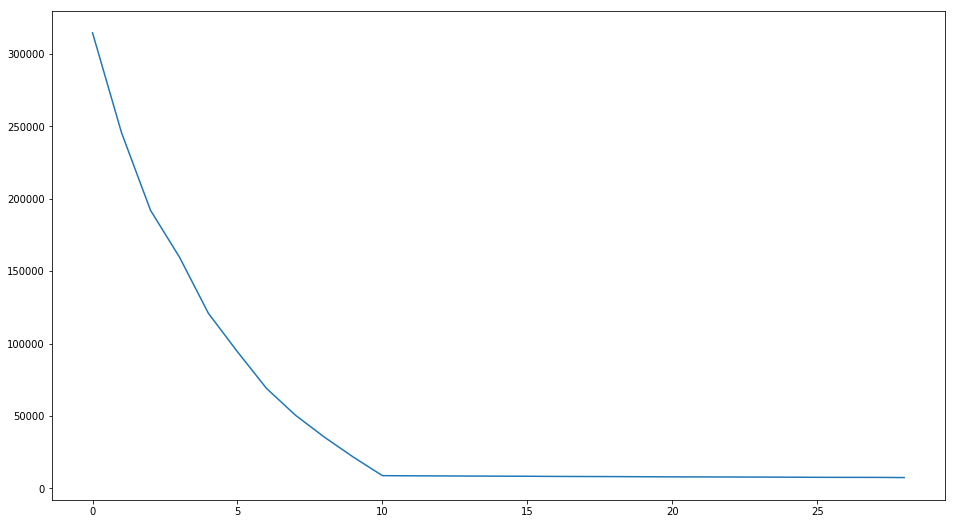

In [50]:
# sum of squared distances
ssd = []
for num_clusters in list(range(1,30)):
    model_clus = KMeans(n_clusters = num_clusters, max_iter=100)
    model_clus.fit(X)
    ssd.append(model_clus.inertia_)

plt.plot(ssd)

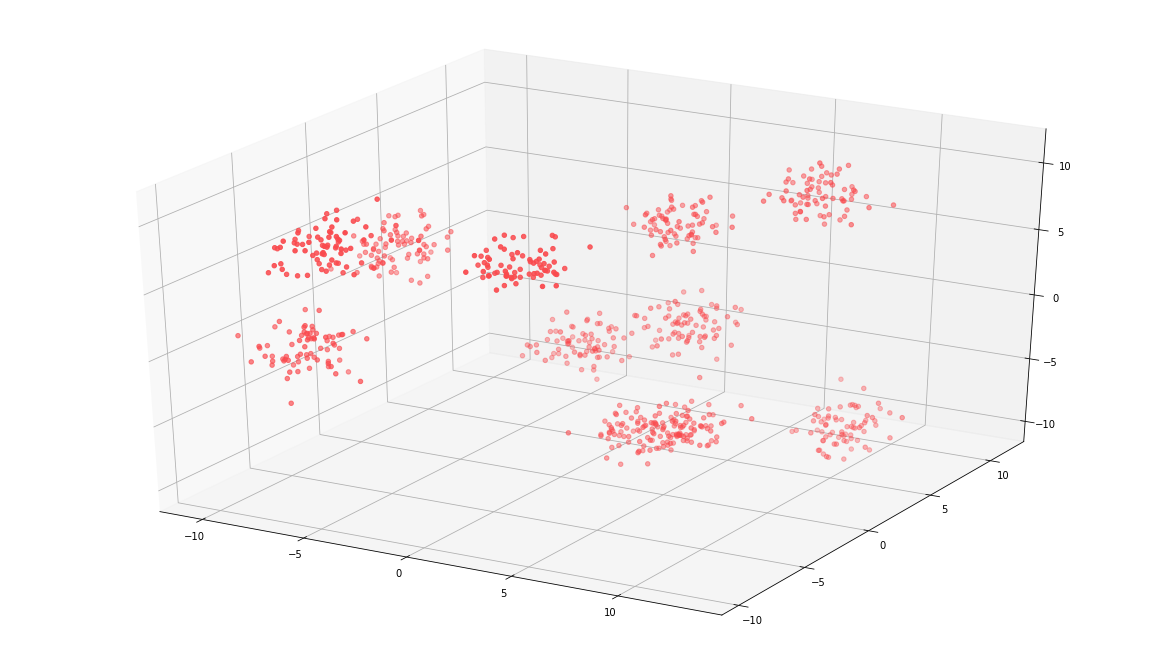

In [83]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)

# Creating a sample dataset with11 clusters
X,y = make_blobs(n_samples=800, n_features=11, centers=11)
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2],c='#fa4a4e')

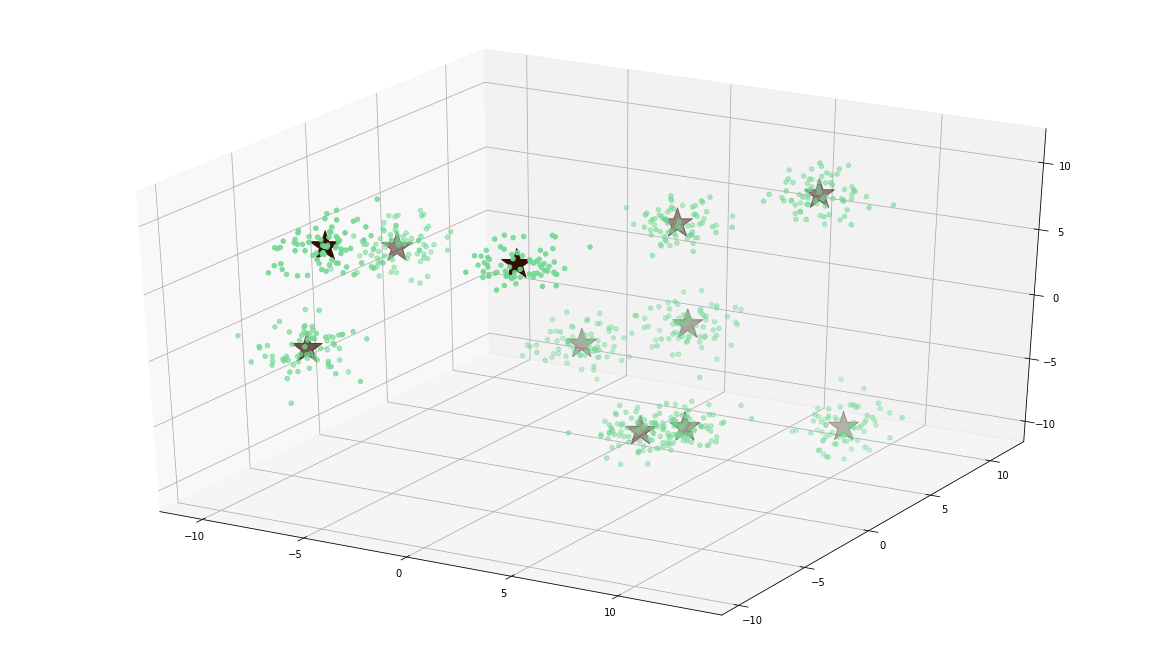

In [92]:
# Initializing KMeans
kmeans = KMeans(n_clusters=11)
# Fitting with inputs
kmeans = kmeans.fit(X)
# Predicting the clusters
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c='#71d892')
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#2d0e00', s=1000)